# Dynamic IS-LM Model Exercises

This notebook was made by Thodoris Kourtalis for AUEB 1412 ,it analyzes a closed economy with the following features:

- **Total Demand:** $(D_t = C_t + I_t + G_t)$
- **Consumption:** $(C_t = \bar{C} + c\,(Y_{t-1} - T_{t-1}))$
- **Investment:** $(I_t = \bar{I} + \alpha\,Y_{t-1} - b\,i_{t-1})$

### Base parameters:

- $(\bar{C} = 0.6, \; \bar{I} = 0.2)$
- $(c = 0.5, \; \alpha = 0.1, \; b = 0.1)$
- Fiscal: $(G_t = T_t = 1.7)$
- Monetary: $(i_t = 0.04)$

The notebook is structured as follows:

1. **Mathematical Derivation**: Derive the steady state and the dynamic transition using the total-demand logic.
2. **Exercise 1**: Compute and display the base steady state.
3. **Exercise 2**: Simulate the dynamic transition when $Y_{-1} = 0.9Y^*$ for three different values of $c$.
4. **Exercise 3**: Analyze three policy shocks (increases in government spending, taxes, and nominal interest rate) applied at $t=0$, including the dynamics of employment $(L_t = 0.7Y_t)$.

Let's begin with the derivation.

## Mathematical Derivation

### Steady State

In our model, total demand is given by:

 $(D_t = C_t + I_t + G_t)$.

Substitute the behavioral equations:

 $(C_t = \bar{C} + c\,(Y_{t-1} - T_{t-1}))$  and  $(I_t = \bar{I} + \alpha\,Y_{t-1} - b\,i_{t-1})$.

In steady state we set $Y_t = Y_{t-1} = Y$ and $T_t = T_{t-1} = T$, yielding:

 $Y = \bar{C} + c\,(Y - T) + \bar{I} + \alpha Y - b\,i + G$.

Collecting terms with $Y$:

 $Y (1 - c - \alpha) = \bar{C} + \bar{I} + G - cT - b\,i$.

Thus, the steady state is given by:

 $$Y^* = \frac{\bar{C} + \bar{I} + G - cT - b\,i}{1 - c - \alpha}.$$ 

For $c = 0.5$:

- $(\bar{C} + \bar{I} + G = 0.6 + 0.2 + 1.7 = 2.5)$,
- $(cT + b\,i = 0.5 \times 1.7 + 0.1 \times 0.04 = 0.85 + 0.004 = 0.854)$,
- $(1 - c - \alpha = 1 - 0.5 - 0.1 = 0.4)$.

So,

 $$Y^* \approx \frac{2.5 - 0.854}{0.4} \approx \frac{1.646}{0.4} \approx 4.115.$$ 

### Dynamic Transition

Assume the economy starts at $Y_{-1} = 0.9Y^*$. At each time $t$ we have:

 $(C_t = \bar{C} + c\,(Y_{t-1} - T))$, 
 $(I_t = \bar{I} + \alpha\,Y_{t-1} - b\,i)$, 

and hence:

 $(D_t = C_t + I_t + G)$.

We set $Y_t = D_t$, so the dynamics become:

 $$Y_t = \bar{C} + c\,(Y_{t-1} - T) + \bar{I} + \alpha\,Y_{t-1} - b\,i + G.$$ 

This process converges to $Y^*$ as derived above.

### Policy Shocks (Exercise 3)

At $t = 0$, consider three separate shocks:

1. **Gov Spending +50%:** $(G' = 2.55)$.
2. **Taxes +30%:** $(T' = 2.21)$.
3. **Nominal Interest Rate +100bps:** $(i' = 0.05)$.

For each case, the new steady state is:

 $$Y^{*}_{new} = \frac{\bar{C} + \bar{I} + G_{new} - cT_{new} - b\,i_{new}}{1 - c - \alpha}.$$ 

The dynamic transition is then obtained by computing the time path using these equations. 

Employment is defined as $(L_t = \gamma Y_t)$ with $\gamma = 0.7$.


In [13]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_params(c=0.5, G=1.7, T=1.7, i=0.04):
    return {
        'C_bar': 0.6,
        'I_bar': 0.2,
        'c': c,
        'alpha': 0.1,
        'b': 0.1,
        'G': G,
        'T': T,
        'i': i
    }

def steady_state(params):
    C_bar = params['C_bar']
    I_bar = params['I_bar']
    c = params['c']
    alpha = params['alpha']
    b = params['b']
    G = params['G']
    T = params['T']
    i = params['i']
    # Using total demand: D_t = C_t + I_t + G_t,
    # with C_t = C_bar + c*(Y-T) and I_t = I_bar + alpha*Y - b*i in steady state,
    # we have: Y = C_bar + c*(Y-T) + I_bar + alpha*Y - b*i + G
    D = C_bar + I_bar + G - c * T - b * i
    beta = c + alpha
    Y_ss = D / (1 - beta)
    C_ss = C_bar + c * (Y_ss - T)
    I_ss = I_bar + alpha * Y_ss - b * i
    return Y_ss, C_ss, I_ss, D, beta

def dynamic_path(Y_init, params, periods=20):
    # At each period, we compute:
    # C_t = C_bar + c*(Y_{t-1} - T)
    # I_t = I_bar + alpha*Y_{t-1} - b*i
    # G_t = G  and D_t = C_t + I_t + G_t
    # We then set Y_t = D_t
    C_bar = params['C_bar']
    I_bar = params['I_bar']
    c = params['c']
    alpha = params['alpha']
    b = params['b']
    T = params['T']
    i = params['i']
    G = params['G']
    
    Y = np.zeros(periods + 1)
    C = np.zeros(periods + 1)
    I = np.zeros(periods + 1)
    D_arr = np.zeros(periods + 1)
    
    Y_prev = Y_init  # Start with initial condition Y_{-1}
    for t in range(periods + 1):
        C_t = C_bar + c*(Y_prev - T)
        I_t = I_bar + alpha*Y_prev - b*i
        G_t = G
        D_t = C_t + I_t + G_t
        Y[t] = D_t
        C[t] = C_t
        I[t] = I_t
        D_arr[t] = D_t
        Y_prev = D_t  # Update for the next period
    return Y, C, I, D_arr

gamma = 0.7  # Employment factor: L_t = gamma * Y_t

In [15]:
# Exercise 1: Base Steady State (for c = 0.5)
base_params = get_params(c=0.5)
Y_ss, C_ss, I_ss, D, beta = steady_state(base_params)
print("Exercise 1: Base Steady State (c = 0.5)")
print(f"Y_ss = {Y_ss:.4f}")
print(f"C_ss = {C_ss:.4f}")
print(f"I_ss = {I_ss:.4f}")

Exercise 1: Base Steady State (c = 0.5)
Y_ss = 4.1150
C_ss = 1.8075
I_ss = 0.6075


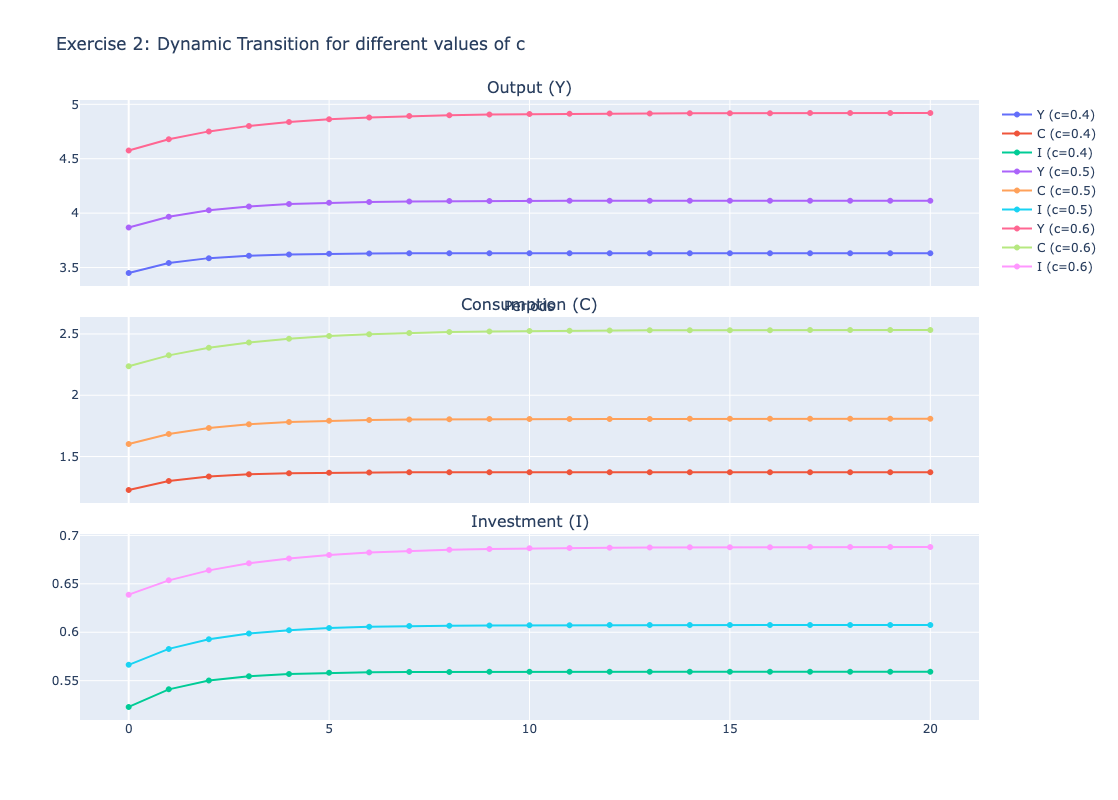

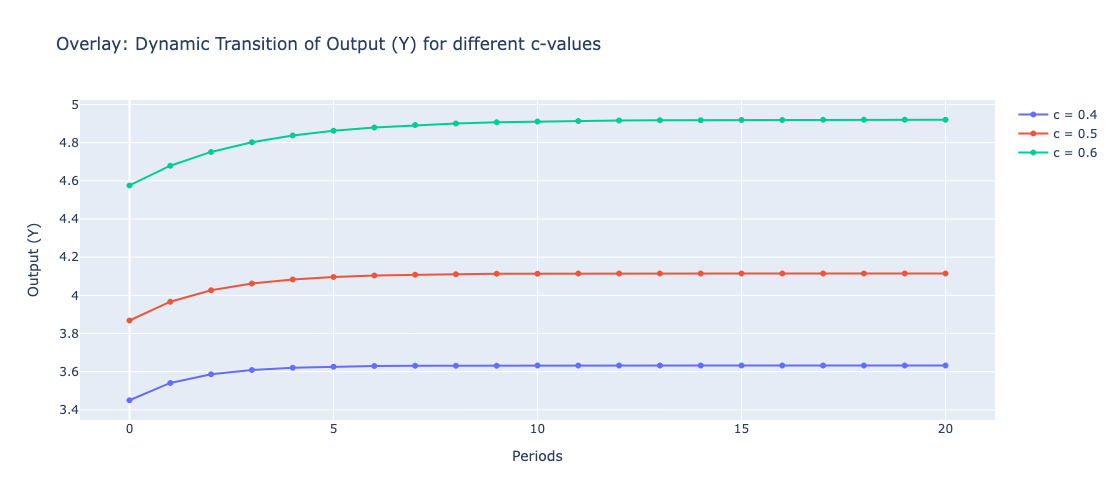

In [17]:
# Exercise 2: Dynamic Transition with Y₋₁ = 0.9 × Y_ss for various c-values
from plotly.subplots import make_subplots

c_values = [0.4, 0.5, 0.6]
periods = 20
Y_paths = {}
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.05,
                    subplot_titles=("Output (Y)", "Consumption (C)", "Investment (I)"))

for c_val in c_values:
    p = get_params(c=c_val)
    Y_ss_i, _, _, _, _ = steady_state(p)
    # For each c, set the initial condition as 0.9 × that steady state
    Y0 = 0.9 * Y_ss_i
    Ydyn, Cdyn, Idyn, _ = dynamic_path(Y0, p, periods)
    t = np.arange(0, periods+1)
    Y_paths[c_val] = Ydyn
    fig.add_trace(go.Scatter(x=t, y=Ydyn, mode='lines+markers', name=f'Y (c={c_val})'), row=1, col=1)
    fig.add_trace(go.Scatter(x=t, y=Cdyn, mode='lines+markers', name=f'C (c={c_val})'), row=2, col=1)
    fig.add_trace(go.Scatter(x=t, y=Idyn, mode='lines+markers', name=f'I (c={c_val})'), row=3, col=1)

fig.update_layout(title='Exercise 2: Dynamic Transition for different values of c',
                  xaxis_title='Periods',
                  height=800)
fig.show()

# Overlay of Y paths for different c-values
fig_overlay = go.Figure()
for c_val, Ydyn in Y_paths.items():
    fig_overlay.add_trace(go.Scatter(x=np.arange(0, periods+1), y=Ydyn, mode='lines+markers', name=f'c = {c_val}'))
fig_overlay.update_layout(title='Overlay: Dynamic Transition of Output (Y) for different c-values',
                          xaxis_title='Periods',
                          yaxis_title='Output (Y)',
                          height=500)
fig_overlay.show()

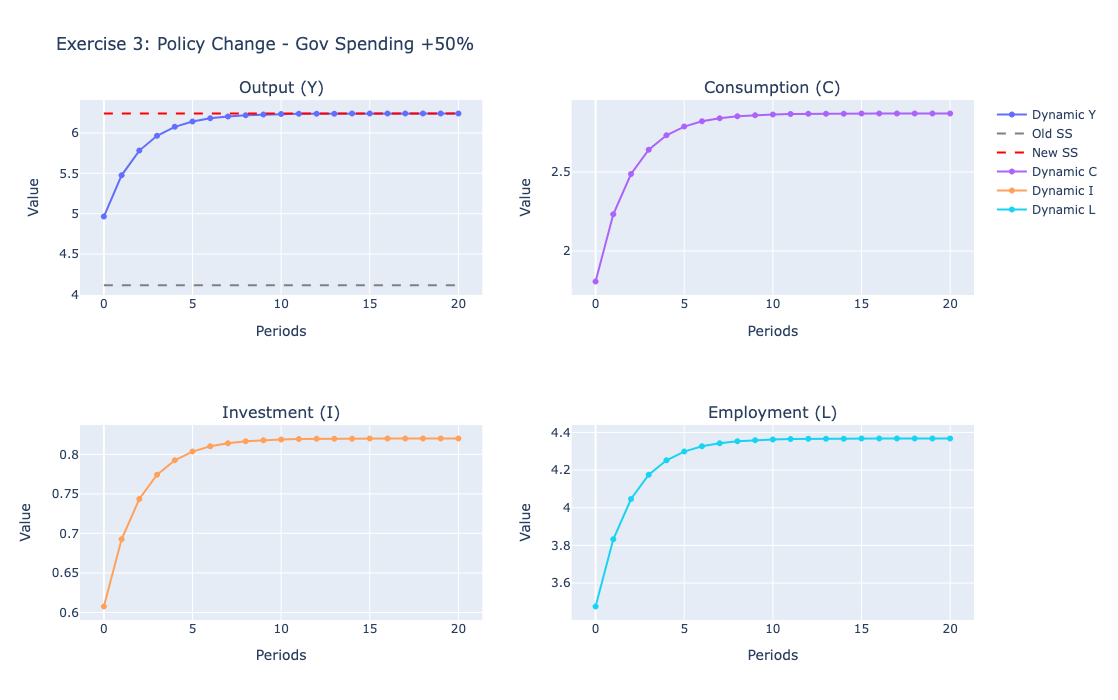

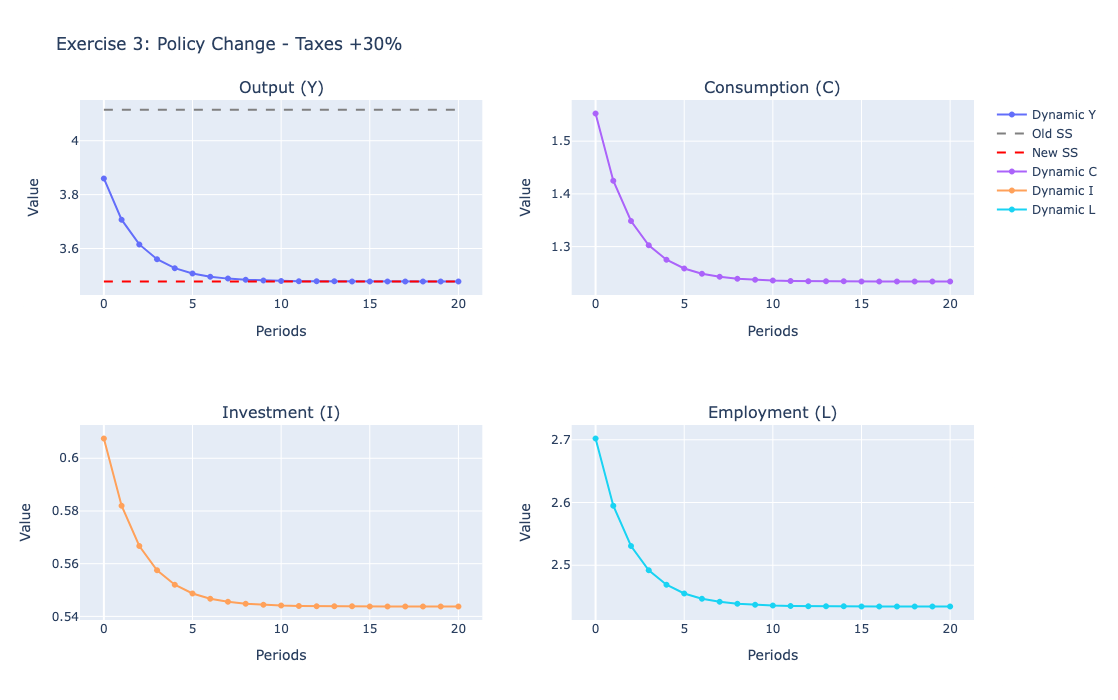

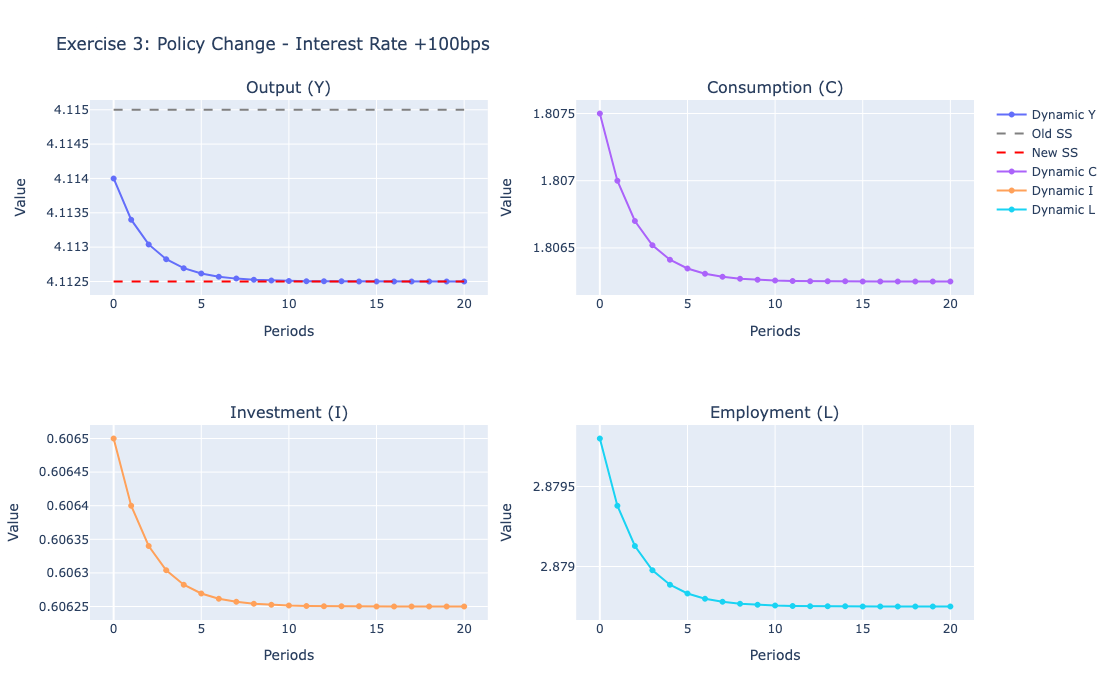

In [19]:
# Exercise 3: Policy Changes on the base steady state (c = 0.5)

policy_scenarios = {
    'Gov Spending +50%': {'G': 1.7 * 1.5, 'T': 1.7, 'i': 0.04},
    'Taxes +30%': {'G': 1.7, 'T': 1.7 * 1.3, 'i': 0.04},
    'Interest Rate +100bps': {'G': 1.7, 'T': 1.7, 'i': 0.04 + 0.01}
}

for name, change in policy_scenarios.items():
    p_new = get_params(c=0.5, G=change['G'], T=change['T'], i=change['i'])
    Y_ss_new, _, _, _, _ = steady_state(p_new)
    # In Exercise 3 the economy starts at the original steady state from Exercise 1
    Y_init = Y_ss
    Y_dyn, C_dyn, I_dyn, _ = dynamic_path(Y_init, p_new, periods)
    L_dyn = gamma * Y_dyn
    t = np.arange(0, periods+1)
    
    fig_policy = make_subplots(rows=2, cols=2,
                               subplot_titles=("Output (Y)", "Consumption (C)", "Investment (I)", "Employment (L)"))
    
    fig_policy.add_trace(go.Scatter(x=t, y=Y_dyn, mode='lines+markers', name='Dynamic Y'), row=1, col=1)
    fig_policy.add_trace(go.Scatter(x=[0, periods], y=[Y_ss, Y_ss], mode='lines', name='Old SS', line=dict(dash='dash', color='grey')), row=1, col=1)
    fig_policy.add_trace(go.Scatter(x=[0, periods], y=[Y_ss_new, Y_ss_new], mode='lines', name='New SS', line=dict(dash='dash', color='red')), row=1, col=1)
    
    fig_policy.add_trace(go.Scatter(x=t, y=C_dyn, mode='lines+markers', name='Dynamic C'), row=1, col=2)
    
    fig_policy.add_trace(go.Scatter(x=t, y=I_dyn, mode='lines+markers', name='Dynamic I'), row=2, col=1)
    
    fig_policy.add_trace(go.Scatter(x=t, y=L_dyn, mode='lines+markers', name='Dynamic L'), row=2, col=2)
    
    fig_policy.update_layout(title=f'Exercise 3: Policy Change - {name}', showlegend=True, height=700, width=900)
    fig_policy.update_xaxes(title_text='Periods')
    fig_policy.update_yaxes(title_text='Value')
    fig_policy.show()